### EDA on ECG5000 Dataset

In [46]:
import pandas as pd
import numpy as np

# using Seaborne for hist
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

In [36]:
# let's give human readable names to columns.

# start working on TRAIN_NEW dataset (4500 records)
# give human friendly names to columns
columns = ['label']

# P1 to P140 are the data point of the ECG fragment
for i in range(1, 141):
    columns.append('P' + str(i))

data.columns = columns

In [37]:
FILE_TRAIN = "ECG5000_TRAIN_NEW.txt"
FILE_TEST = "ECG5000_TEST_NEW.txt"

data = pd.read_csv(FILE_TRAIN, delim_whitespace = True, header=None, engine = 'python', names=columns)
data_test = pd.read_csv(FILE_TEST, delim_whitespace = True, header=None, engine = 'python', names=columns)

In [38]:
data.describe()

,label,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P131,P132,P133,P134,P135,P136,P137,P138,P139,P140
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,1.527778,-0.273962,-1.660351,-2.497708,-3.121793,-3.166346,-2.862646,-2.271681,-1.797901,-1.407947,...,0.146259,0.073410,-0.060409,-0.273551,-0.502636,-0.753850,-0.824197,-0.630282,-0.474437,-0.694958
std,0.761301,1.153257,1.448446,1.384922,1.300375,1.101844,0.906330,0.735420,0.628203,0.642411,...,1.175640,1.410561,1.652410,1.899489,2.063698,2.087378,2.050563,1.848085,1.817460,1.411511
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.259295,-5.330194,-4.782240,-4.311288,-4.071361,...,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-4.911417,-4.880460,-5.496107,-5.880890,-6.092227
25%,1.000000,-1.018202,-2.710514,-3.675967,-4.221921,-4.006748,-3.472986,-2.779941,-2.164166,-1.773173,...,-0.667551,-1.104062,-1.598281,-2.157220,-2.743237,-3.014821,-2.856324,-2.131719,-1.635179,-1.577515
50%,1.000000,-0.303240,-1.672456,-2.592071,-3.397653,-3.460329,-2.938500,-2.282163,-1.748535,-1.420713,...,0.481311,0.676028,0.732593,0.608052,0.335153,-0.025628,-0.180293,-0.191248,-0.144524,-0.551293
75%,2.000000,0.485655,-0.684776,-1.519119,-2.240458,-2.530796,-2.397532,-1.822741,-1.483616,-1.059521,...,1.064272,1.173172,1.239463,1.267172,1.237470,1.037941,0.947254,0.948825,1.002692,0.277078
max,5.000000,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,...,2.880345,3.007606,2.854680,2.912134,2.937685,3.351437,3.432518,3.579448,4.425976,7.402103


In [39]:
data.shape

(4500, 141)

In [40]:
data_test.shape

(500, 141)

In [41]:
# let's convert label column to int32
data['label'] = data['label'].astype('int32')
data_test['label'] = data_test['label'].astype('int32')

In [42]:
data.head(10)

,label,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P131,P132,P133,P134,P135,P136,P137,P138,P139,P140
0,1,3.690844,0.711414,-2.114092,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,...,-0.032477,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073
1,1,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,...,0.937984,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009
2,1,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,...,0.368820,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767
3,1,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,...,0.894638,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853
4,1,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,...,1.416582,1.280823,1.494316,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784
5,1,1.649272,1.121169,-0.628753,-1.939899,-3.439175,-4.010776,-3.238067,-2.127737,-1.798465,...,0.229317,0.636727,1.166689,1.062871,1.628234,2.175072,2.500749,2.092176,1.455313,2.124303
6,1,-0.323103,-1.510804,-2.768216,-3.788649,-4.100396,-3.516576,-2.940032,-1.828790,-1.089045,...,1.421767,1.052238,0.213416,-1.003917,-1.676931,-2.055868,-1.968963,-1.548612,-1.411230,-2.620855
7,1,-1.309274,-4.045362,-4.757328,-4.657040,-3.634479,-2.469447,-1.640088,-1.408992,-0.706937,...,0.651832,1.371353,1.257078,1.246964,1.156629,0.311326,-0.325923,-0.385273,0.385835,-0.393619
8,1,-1.736906,-3.647089,-4.005470,-4.413745,-4.082557,-3.234594,-1.935797,-1.367653,-1.055027,...,1.085795,1.130086,1.317606,1.181094,0.976701,0.541003,0.288060,0.479704,0.658353,-0.326727
9,1,-1.101873,-1.965967,-2.399643,-2.905194,-3.107600,-3.041231,-2.105358,-1.621213,-1.589307,...,1.390032,1.436628,0.931638,0.332091,0.409455,0.489593,0.890026,1.026954,0.937848,0.321598


In [56]:
# plot some samples
def plot_ecg(vec, index):
    '''
    vec is the entire set of data
    index identify the fragment to visualize
    '''
    label = vec[index, 0]
    
    vet = vec[index, 1:]
    time = np.arange(len(vet))

    plt.figure(figsize = (8,4))

    plt.plot(time, vet, 'b')

    plt.xlabel('Time')
    plt.ylabel('Signal')
    
    plt.show()

In [71]:
# to scale each plot in [0, 1]
def scale_ecg(vec):
    new_vec = (vec - vec.min())/(vec.max() - vec.min())
    return new_vec

In [93]:
# plot a subplot with 4 fragments
def plot_group(vec, start_index, scale):
    '''
    vec is the np array from dataframe
    scale = True, False
    
    scale=TRue: vet is scaled to [0,1]
    '''
    START_INDEX = start_index

    plt.figure(figsize = (32,6))

    # len(time) is always the same, calculate only one
    time = np.arange(len(vec[START_INDEX, 1:]))

    for i in range(1, 5):
        plt.subplot(1, 4, i)
        index = START_INDEX + i
        label = vec[index, 0]
        
        vet = vec[index, 1:]
        
        # scaling must be done after removing the label
        if scale:
            vet = scale_ecg(vet)
    
        plt.plot(time, vet, 'b')
        plt.title('label: ' + str(label) )
        plt.xlabel('Time')
        plt.ylabel('Signal')

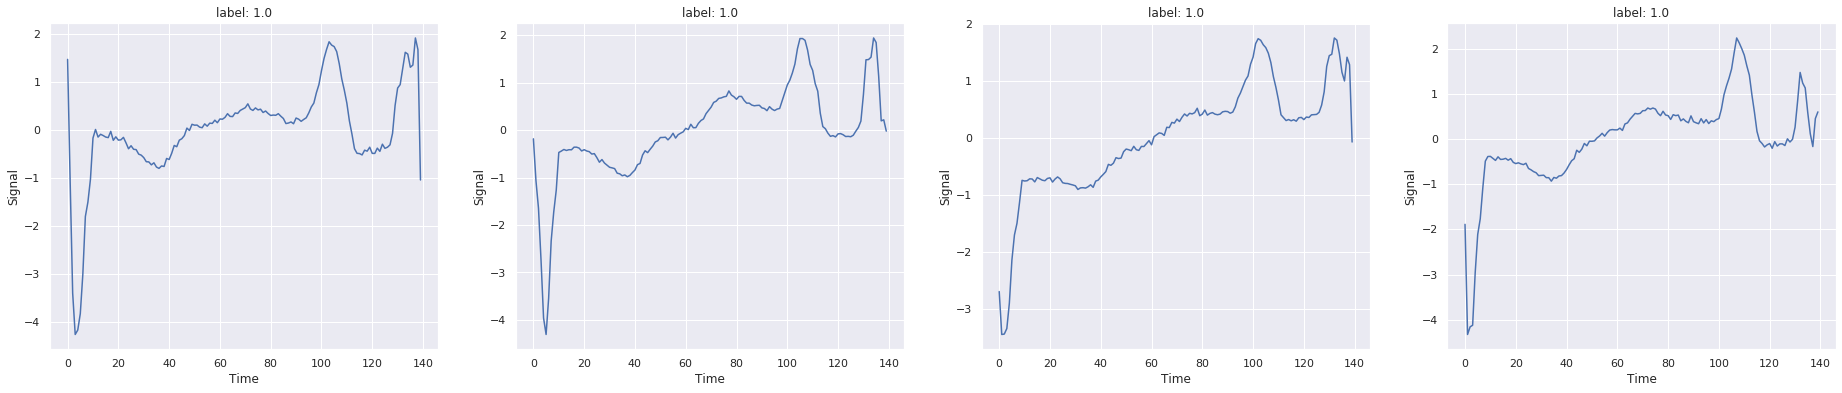

In [98]:
plot_group(np.array(data), 1000, scale=False)

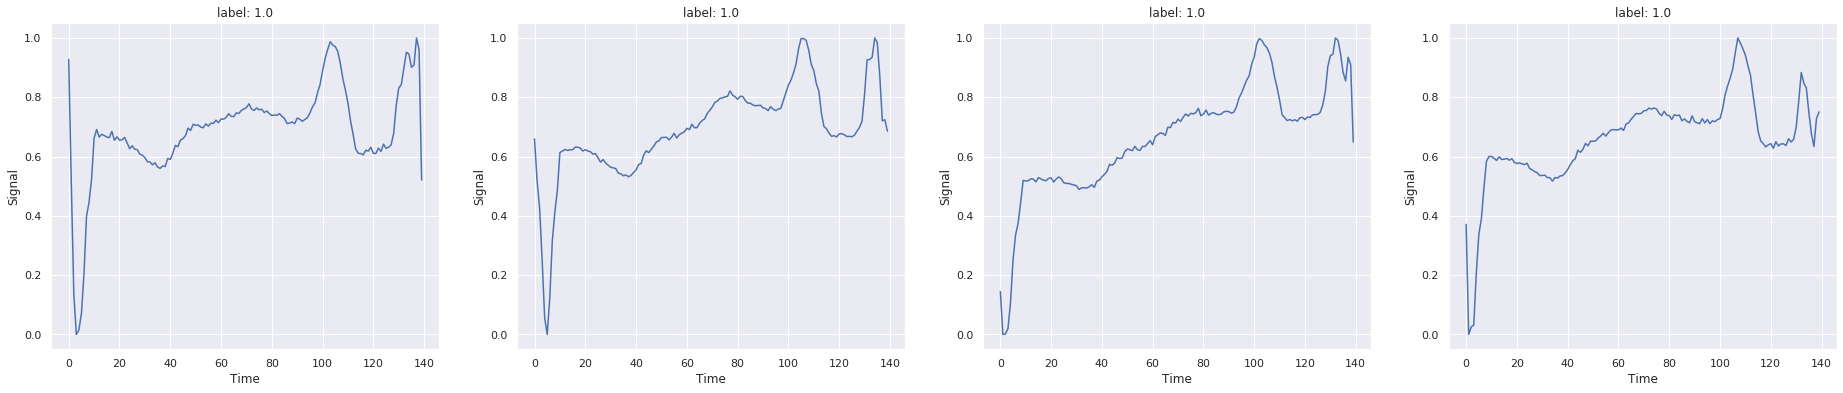

In [99]:
plot_group(np.array(data), 1000, scale=True)

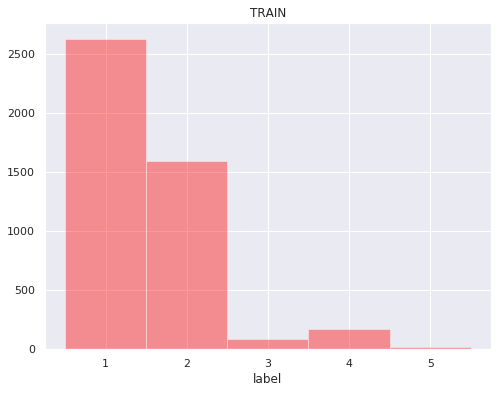

In [103]:
# let's examine the distribution of labels in the two dataset

# start with TRAIN_NEW

bins = np.array([0])

bins = np.append(bins, data['label'].unique())

bins = bins + 0.5

plt.figure(figsize = (8,6))
plt.title('TRAIN')
sns.distplot(data['label'], bins = bins, kde= False, color = 'red');

We see that most of the samples are normal (label = 1)

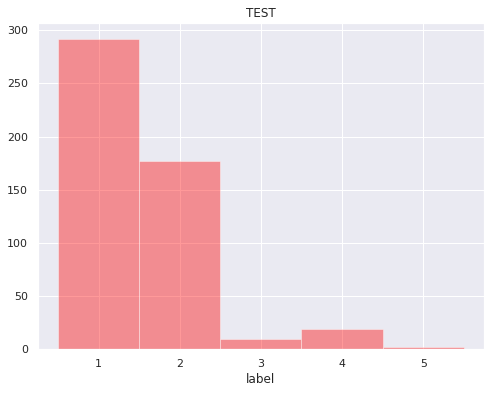

In [104]:
bins = np.array([0])

bins = np.append(bins, data_test['label'].unique())

bins = bins + 0.5

plt.figure(figsize = (8,6))
plt.title('TEST')
sns.distplot(data_test['label'], bins = bins, kde= False, color = 'red');

we can conclude that TRAIN and TEST have the same distribution for label, which is good!

#### Be careful. If you have a look at the files you see that records with label = 1 are ALL at the beginning of the file.
#### this is not really important for AutoEncoder, since during training we're taking only records with label = 1.
#### but it is really important when we use Conv1D, if we're doing K-fold validation. we need to shuffle the train dataset before training.